# Preparing time series from wide form data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [2]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

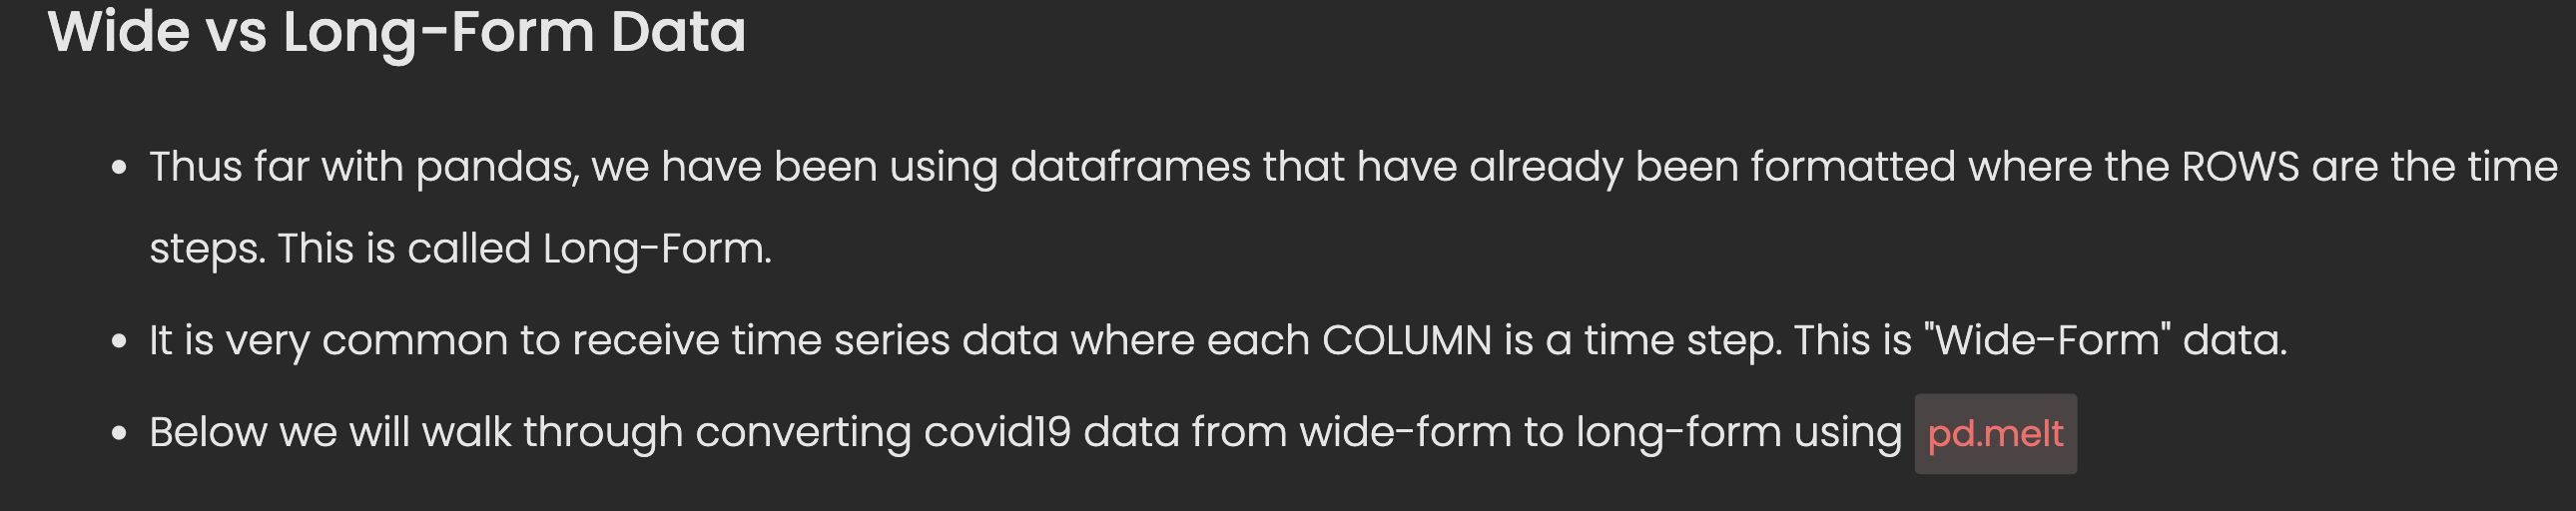

# Wide form - Covid 19 case

In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtZ3XGbdzViSOsO6Gam4LQAQTSrFMXSAz_CIcBmmQYBv9uuggbGcxUuqXtMeUPiHR9NyI6At3apf5d/pub?output=csv"
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22,7/1/22,7/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181987,182033,182072,182149,182228,182324,182403,182528,182594,182643
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,278211,278504,278793,279077,279077,279167,280298,280851,281470,282141
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266015,266025,266030,266038,266049,266062,266073,266087,266105,266115
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43774,43774,43774,43774,43774,43774,43774,43774,44177,44177
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,101320,101320,101320,101320,101320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,658503,658503,658503,658503,659853,659853,659853,659853,659853,659853
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11824,11824,11824,11824,11824,11824,11824,11824,11824,11824
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,324922,325110,325110,325110,325348,325498,325498,325857,325857,325857


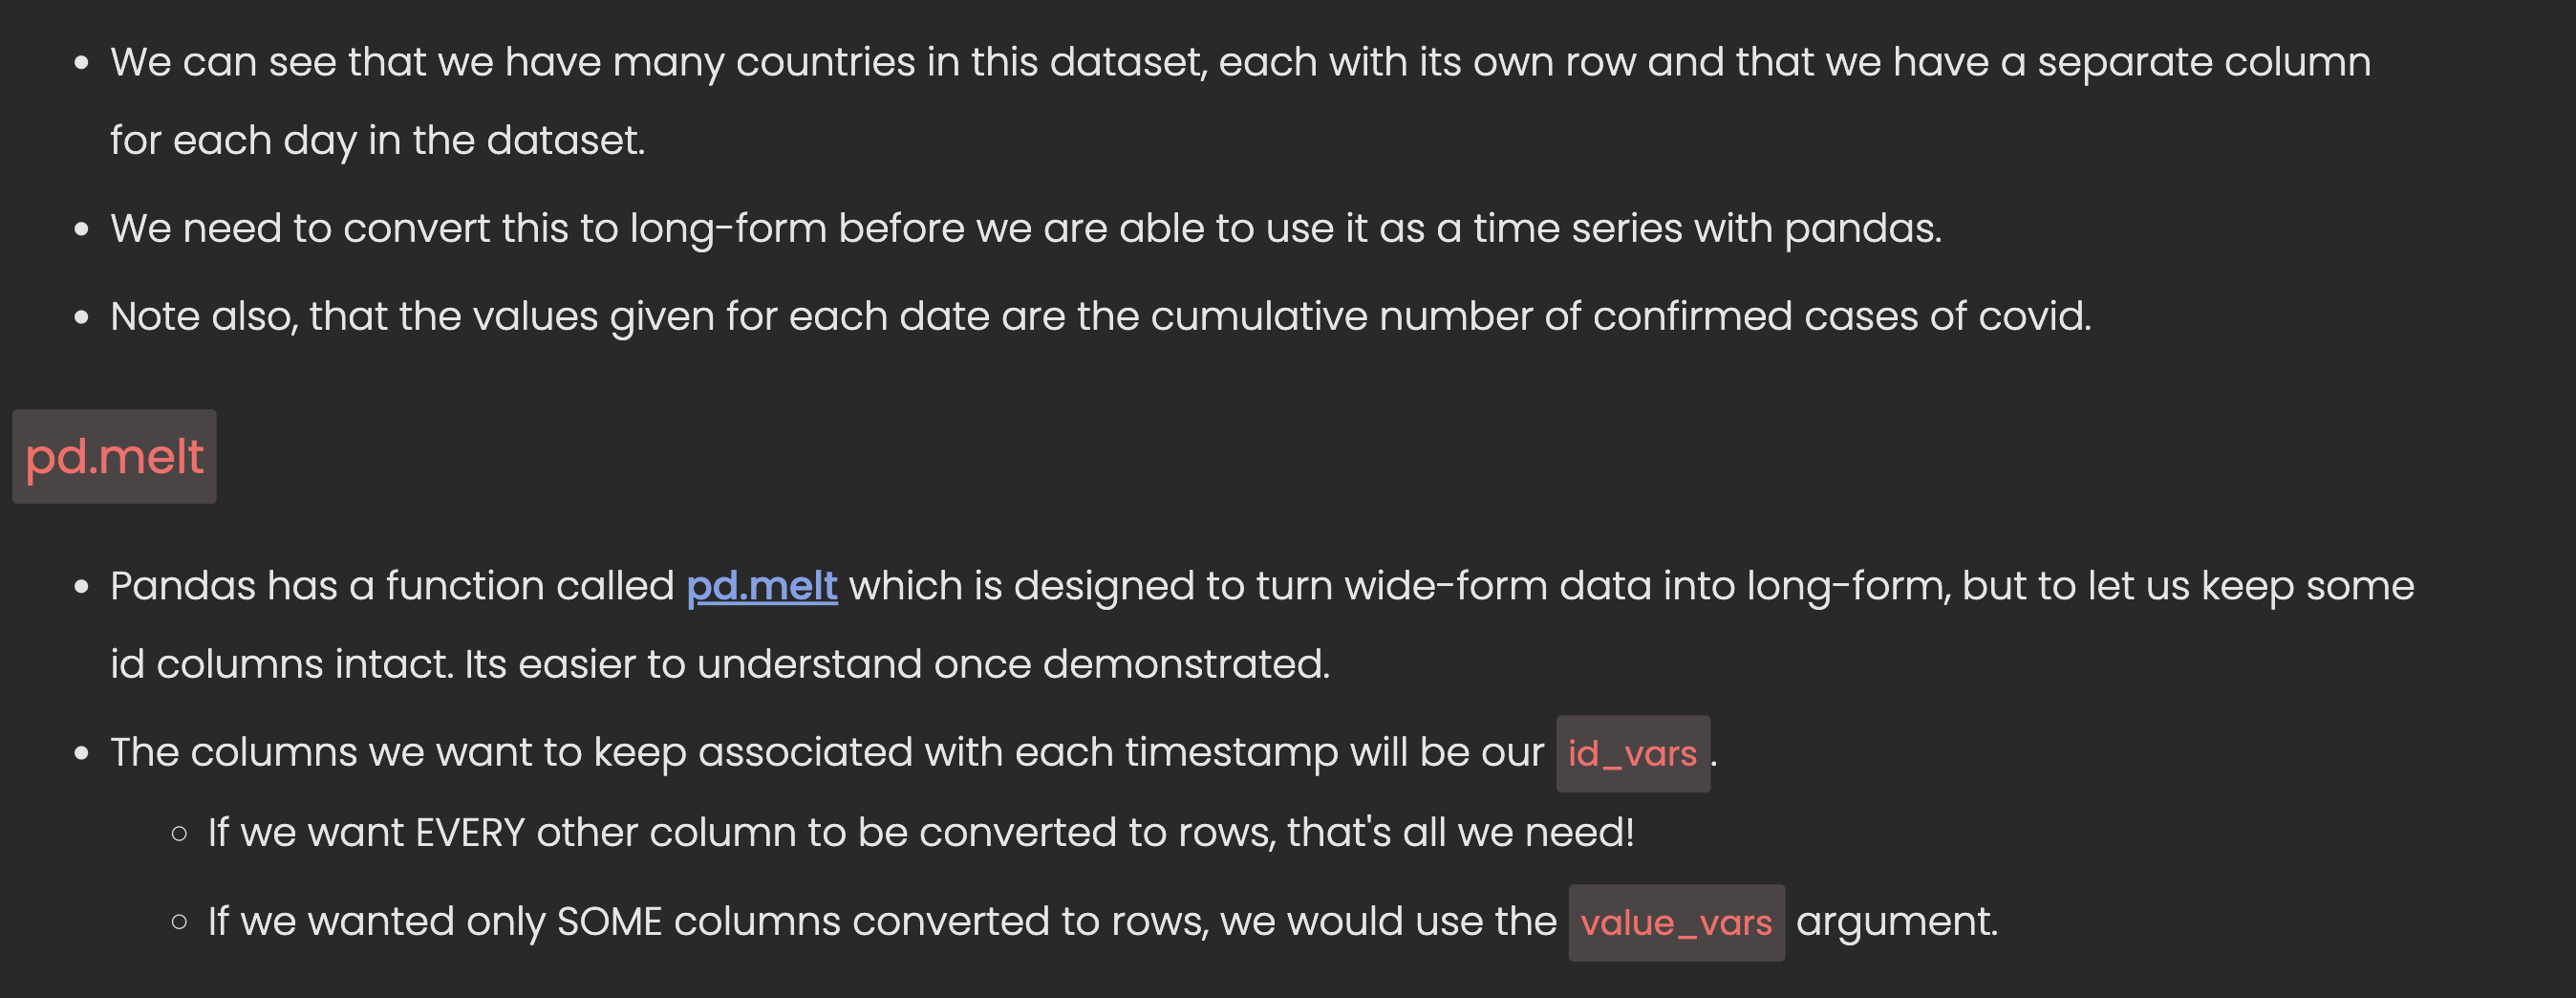

In [4]:
#Let's take a look at the existing columns:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/23/22', '6/24/22', '6/25/22', '6/26/22', '6/27/22', '6/28/22',
       '6/29/22', '6/30/22', '7/1/22', '7/2/22'],
      dtype='object', length=897)

In [5]:
# plan to only keep few cols to bbegin
melted = pd.melt(df,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'] )
melted

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
254500,NaN,West Bank and Gaza,31.952200,35.233200,7/2/22,659853
254501,NaN,Winter Olympics 2022,39.904200,116.407400,7/2/22,535
254502,NaN,Yemen,15.552727,48.516388,7/2/22,11824
254503,NaN,Zambia,-13.133897,27.849332,7/2/22,325857


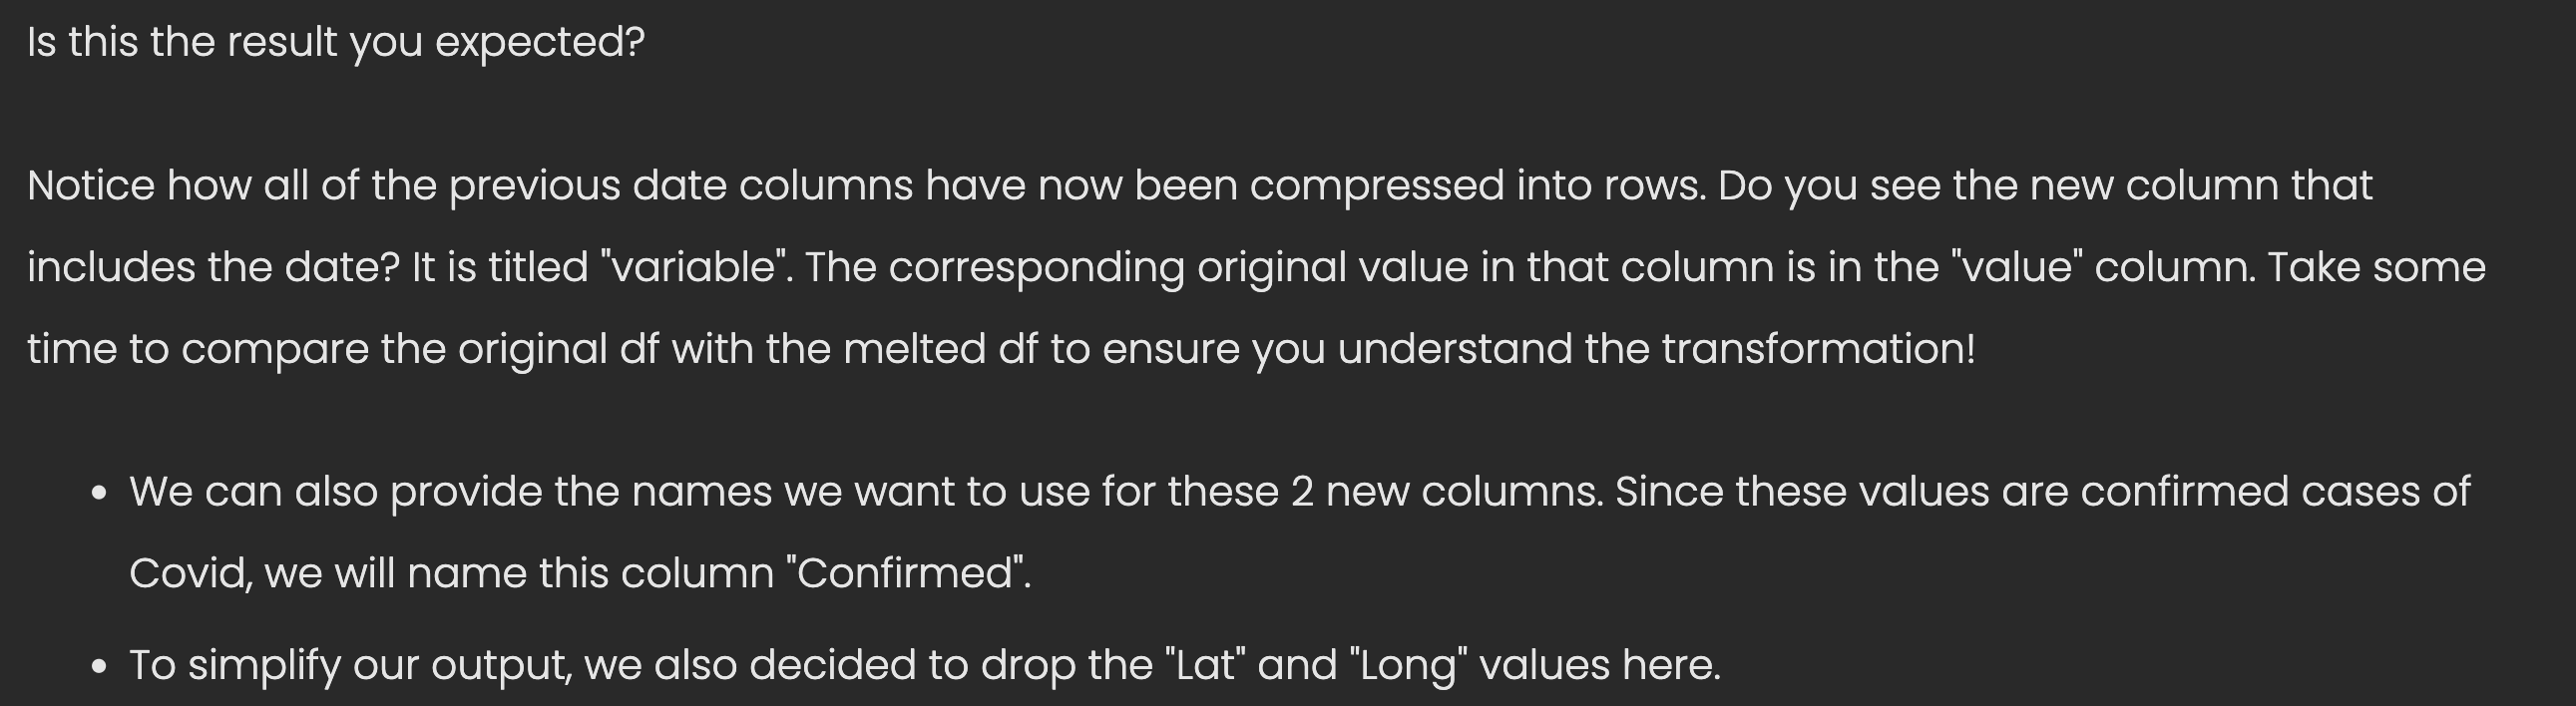

In [6]:
melted = pd.melt(df.drop(columns=['Lat','Long']),
                 id_vars=['Province/State', 'Country/Region'],
                value_name='Confirmed',var_name="Date")
melted

,Province/State,Country/Region,Date,Confirmed
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0
...,...,...,...,...
254500,NaN,West Bank and Gaza,7/2/22,659853
254501,NaN,Winter Olympics 2022,7/2/22,535
254502,NaN,Yemen,7/2/22,11824
254503,NaN,Zambia,7/2/22,325857


## slice out info we want

In [7]:
# date to datetime
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254505 entries, 0 to 254504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  79477 non-null   object        
 1   Country/Region  254505 non-null  object        
 2   Date            254505 non-null  datetime64[ns]
 3   Confirmed       254505 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.8+ MB


In [8]:
# date to index
melted = melted.set_index("Date")
melted

,Province/State,Country/Region,Confirmed
Date,,,
2020-01-22,NaN,Afghanistan,0
2020-01-22,NaN,Albania,0
2020-01-22,NaN,Algeria,0
2020-01-22,NaN,Andorra,0
2020-01-22,NaN,Angola,0
...,...,...,...
2022-07-02,NaN,West Bank and Gaza,659853
2022-07-02,NaN,Winter Olympics 2022,535
2022-07-02,NaN,Yemen,11824


In [9]:
# what if we resample?
# take a look at what happens when we resample
melted.resample("D").sum()

#We now have the sum of all cases for each day, BUT what information have we lost? 
#data broken down by country, but when resampled, all data for each day were combined into 
#a single result. We will explore how can we resample while maintaining the original granularity 
#of our data in the next section.

/var/folders/dj/tq7kx_ys6m161zqrzvh_73q80000gn/T/ipykernel_17983/102191320.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melted.resample("D").sum()


,Confirmed
Date,
2020-01-22,557
2020-01-23,657
2020-01-24,944
2020-01-25,1437
2020-01-26,2120
...,...
2022-06-28,545535742
2022-06-29,546470126
2022-06-30,547500950
